# Geiger Counter Measurements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d

In [2]:
import pandas as pd

Introduce **la misurazione 1** ogni intervallo "*bin*" corrispondono a $5s$, si applica successivamente il metodo di "Average Mean Value" per rendere più curata la misurazione e "liscia". L'obbiettivo è avere più misurazioni prese nello stesso luogo, circa la stessa ora, in modo da applicare le teorie statistiche fondamentali su di una misurazione reale svolta con G.C.

1. Carico i dati di misurazione collezionati in Excel:

In [3]:
df=pd.read_excel('CPM-1st-lesson.xlsx')
print(df)

      1   12
0      2  24
1      3   0
2      4  12
3      5  12
4      6  12
..   ...  ..
600  602   0
601  603  24
602  604  12
603  605  48
604  606  36

[605 rows x 2 columns]


2. Effettuo il plot dei dati "Raw" e filtrati:

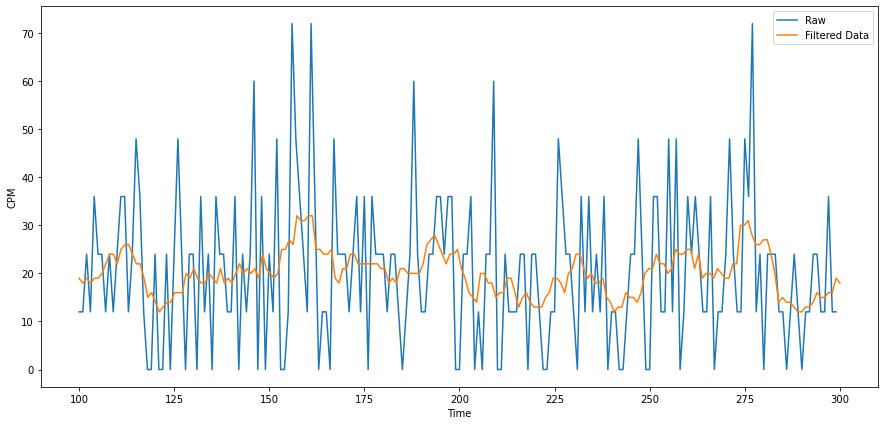

In [4]:
#%matplotlib notebook
plt.figure(figsize=(15,7))
plt.plot(df.iloc[100:300,1],label='Raw') #.iloc[righe,colonne] permette di manipolare l'array di dati

x=df.iloc[100:300,1]
N=10
t=np.linspace(100,300,200)
y= uniform_filter1d(x, size=N)
plt.plot(t,y, label='Filtered Data')
plt.xlabel('Time')
plt.ylabel('CPM')
plt.legend()
#plt.savefig('filteredData.eps',dpi=200)

3. Carico la seconda misurazione

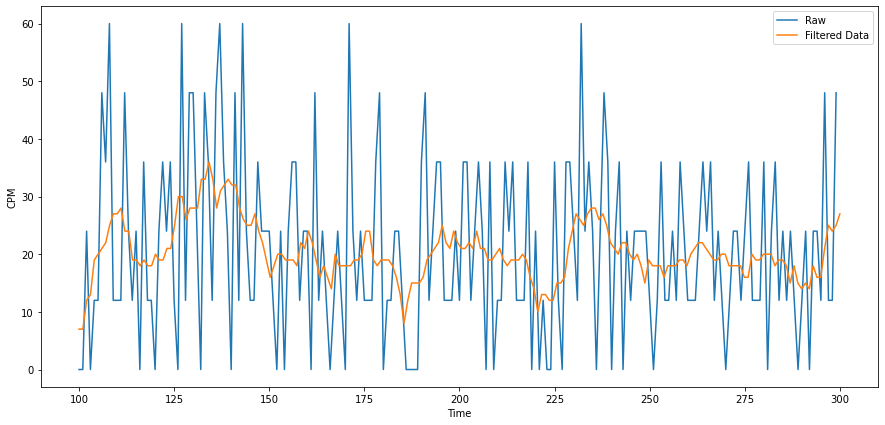

In [5]:
df1=pd.read_excel('CPM-1st-lesson-1.xlsx')

plt.figure(figsize=(15,7))
plt.plot(df1.iloc[100:300,1],label='Raw')
x1=df1.iloc[100:300,1]
y1= uniform_filter1d(x1, size=N)

plt.plot(t,y1, label='Filtered Data')
plt.xlabel('Time')
plt.ylabel('CPM')
plt.legend()

Plotto i valori delle 2 misurazioni filtrate

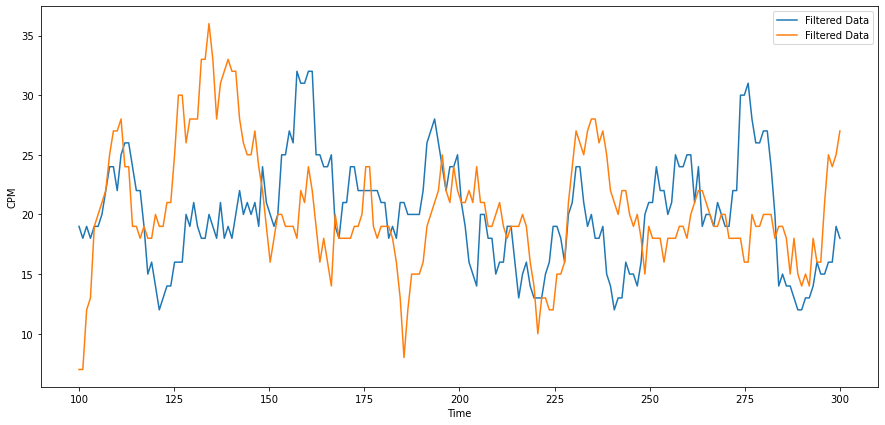

In [6]:
plt.figure(figsize=(15,7))
plt.plot(t,y, label='Filtered Data')
plt.plot(t,y1, label='Filtered Data')
plt.xlabel('Time')
plt.ylabel('CPM')
plt.legend()

Si calcola la distribuzione richiamando il modulo di statistica in Python e utilizzando la **distribuzione normale**
Si ottiene in questo modo un array di dati incapsulati in cui è stata svolta un operazione Gaussiana, questo è molto utile perchè i successivi comandi che esistono possiedono KDE dentro che è un metodo di calcolo che può dare problemi in caso di valori abbastanza discotanti fra di loro... "*norm.rvs()*" non dovrebbe aver problemi. Quindi si calcolano i valori di distribuzione qui, e vengono plottati in un secondo momento.

In [7]:
from scipy.stats import norm
data_normal = norm.rvs(df.iloc[100:300,1],scale=1)

Ulteriore metodo per Plottare dati

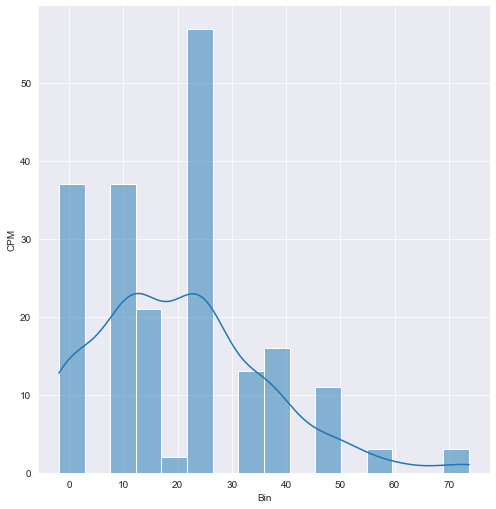

In [9]:
g=sns.displot(data_normal,kde=True, height=7, aspect=1)
g.set_axis_labels("Bin","CPM")

$\implies$ 3. Puro valore statistico della misurazione svolta, non è altro che la stessa distribuzione che ho avuto nei precedenti plot, sulle ascisse si riportano il numero di conteggi per il dato valore ad esempio "quante volte ho ottenuto il valore "70"- pochissime da come si vede.

$\implies$ Si calcolano poi i principali valori statistici:

15.553777676178859 241.91999999999985 20.4 20.4


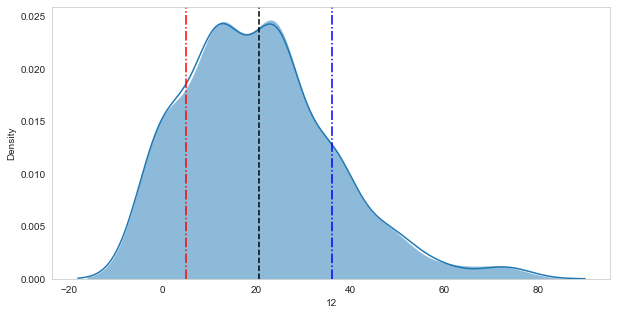

In [10]:

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.kdeplot(data=df.iloc[100:300,1],fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0)

sns.kdeplot(data=data_normal)


sigma=np.std(df.iloc[100:300,1]) #Standard Deviation
S=np.var(df.iloc[100:300,1])     #Varianza
m=np.mean(df.iloc[100:300,1])    #media aritmetica pesata
a=np.average(df.iloc[100:300,1]) #media semplice
print(sigma,S,m,a)


plt.axvline(m,c='k',ls='--')
plt.axvline(m+sigma,c='b',ls='-.')
plt.axvline(m-sigma,c='r',ls='-.')

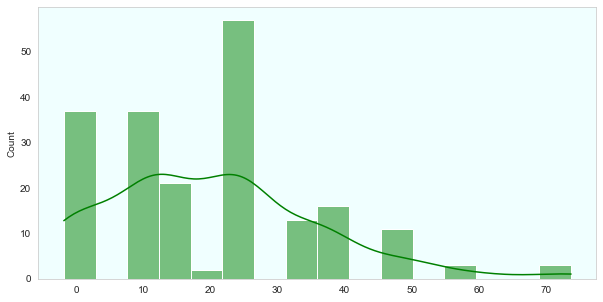

In [11]:
plt.figure(figsize=(10, 5))
ax=sns.histplot(data=data_normal,kde=True,color='g')
ax.grid(False)
ax.set_facecolor("#F0FFFF")
#Il colore della Kde(linea di distribuzione in Histplot non può essere cambiata)

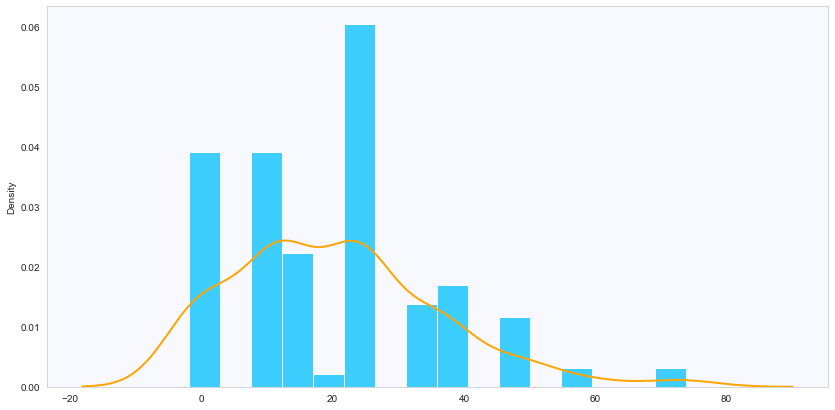

In [12]:
plt.figure(figsize=(14,7))
ax1=sns.histplot(data=data_normal, color='deepskyblue', stat='density')
ax1=sns.kdeplot(data=data_normal, color='orange',lw=2)
ax1.set_facecolor("#F8F8FF")

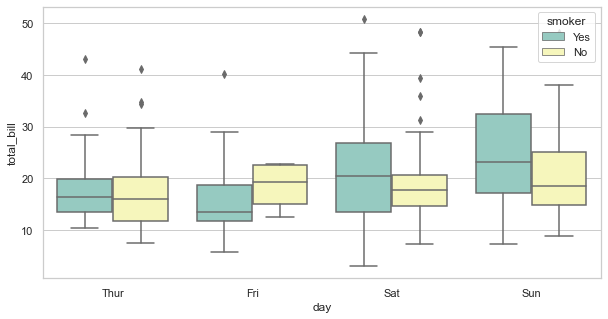

In [13]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
                 data=tips, palette="Set3")

# Formattazione Tabella & "BoxPlot"

In [15]:
dfN=pd.read_excel('CPM-1st-lesson.xlsx',names=["time","CPM"])
#print(dfN)
dfN.iloc[100:300,1].describe()                                #Tipici valori Statistici

count    200.000000
mean      20.400000
std       15.592809
min        0.000000
25%       12.000000
50%       24.000000
75%       24.000000
max       72.000000
Name: CPM, dtype: float64

In [16]:
n=605;
dfN['Type']="low"                                               #Genero una colonna con il "tipo" di attività
for i in range(0,n):
    if 0<=dfN.iloc[i,1]<=8:
        dfN.iloc[i,2]="Very low"
    if 9<dfN.iloc[i,1]<=25:
        dfN.iloc[i,2]="Low"
    if 26<dfN.iloc[i,1]<=55:
        dfN.iloc[i,2]="High"
    if dfN.iloc[i,1]>55:
        dfN.iloc[i,2]="High+"    

Per osservare in completo la tabella: <br>
Eliminare il commento per *Vedere*

In [17]:
#pd.set_option('display.max_rows',None)
#dfN

**BoxPlot**

<AxesSubplot:xlabel='Type', ylabel='CPM'>

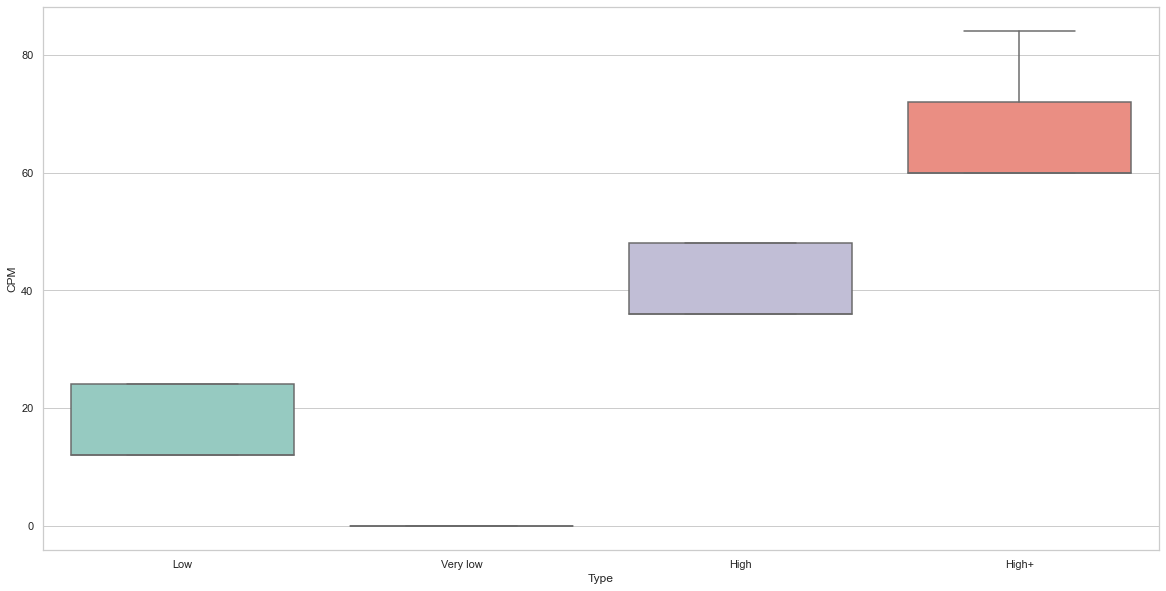

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(data=dfN,x='Type',y='CPM',palette="Set3")


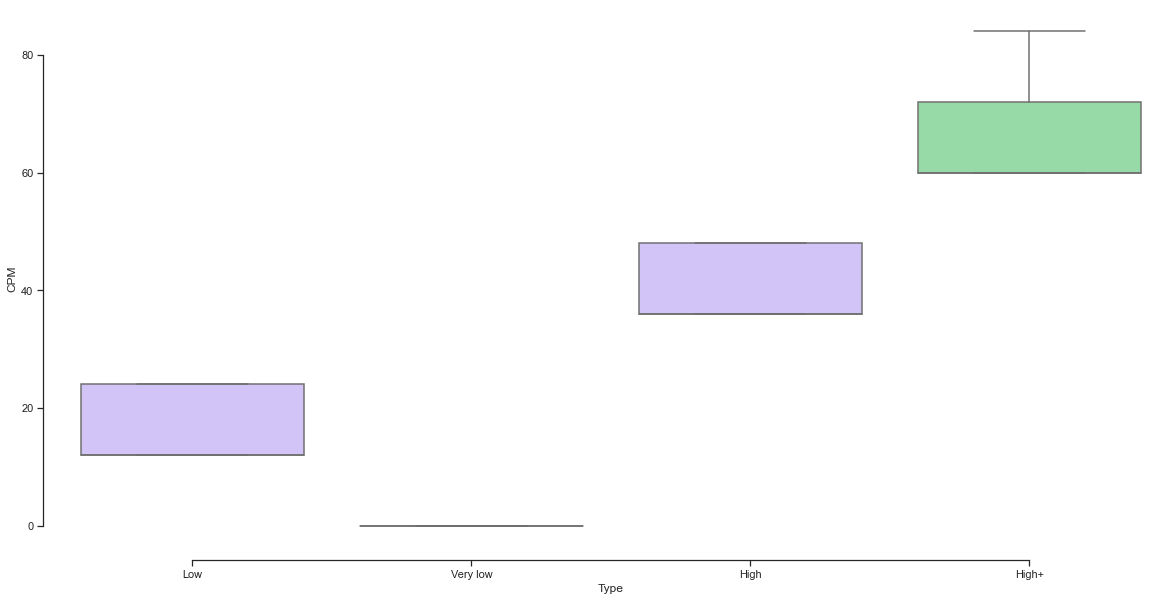

In [19]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Type", y="CPM",
             palette=["m", "g"],
            data=dfN)
sns.despine(offset=10, trim=True)